In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold, datasets
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 600
import os
from collections import defaultdict
from sklearn import datasets

In [10]:
expression_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_gene_raw_reads_30_cells_3500_genes.csv"
cpm_file = '/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix_cpm_int.csv'
label_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/label/GSE57872_processed_label.csv"
exp_profile = pd.read_csv(expression_file,index_col=0)
label_info = pd.read_csv(label_file,index_col=0)
cpm_profile = pd.read_csv(cpm_file,index_col=0)
variable_genes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_variable_genes.csv')

In [12]:
exp_profile.head()

,SRR1294493,SRR1294494,SRR1294496,SRR1294497,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294504,SRR1294505,...,SRR1295344,SRR1295345,SRR1295346,SRR1295347,SRR1295348,SRR1295349,SRR1295350,SRR1295352,SRR1295354,SRR1295355
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000241860.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,1
ENSG00000228463.4,2,0,0,0,0,0,0,0,4,0,...,0,0,0,4,0,3,0,1,2,4
ENSG00000237094.7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ENSG00000225972.1,0,0,0,0,1,0,0,0,0,0,...,1,2,0,10,0,0,1,0,1,0
ENSG00000225630.1,0,0,1,0,0,0,3,1,0,0,...,1,1,2,3,0,0,7,3,1,5


In [57]:
variable_genes.values.reshape(-1)

array(['ENSG00000064886.9', 'ENSG00000175899.10', 'ENSG00000106366.7',
       ..., 'ENSG00000272189.1', 'ENSG00000247416.2', 'ENSG00000171992.8'],
      dtype=object)

In [58]:
cpm_profile_filtered = cpm_profile.loc[variable_genes.values.reshape(-1)[:1000],exp_profile.columns.values]

In [59]:
cpm_profile_filtered

,SRR1294493,SRR1294494,SRR1294496,SRR1294497,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294504,SRR1294505,...,SRR1295344,SRR1295345,SRR1295346,SRR1295347,SRR1295348,SRR1295349,SRR1295350,SRR1295352,SRR1295354,SRR1295355
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000064886.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
ENSG00000175899.10,0,0,0,0,0,0,0,0,0,0,...,86,1926,18,0,0,147,357,254,238,1162
ENSG00000106366.7,0,0,0,0,0,0,0,0,0,0,...,3,194,23,0,0,98,113,6,0,551
ENSG00000112096.12,0,0,0,0,3,0,0,0,0,0,...,0,47,2,452,0,78,34,107,5,146
ENSG00000118785.9,0,311,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000224439.2,0,0,0,0,0,0,0,0,0,0,...,0,0,54,0,0,0,0,0,0,0
ENSG00000170385.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,136,0,0,0,0
ENSG00000125967.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0


In [60]:
cpm_profile_filtered.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_cpm_final_1000genes.csv')

In [61]:
cpm_profile_filtered

,SRR1294493,SRR1294494,SRR1294496,SRR1294497,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294504,SRR1294505,...,SRR1295344,SRR1295345,SRR1295346,SRR1295347,SRR1295348,SRR1295349,SRR1295350,SRR1295352,SRR1295354,SRR1295355
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000064886.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
ENSG00000175899.10,0,0,0,0,0,0,0,0,0,0,...,86,1926,18,0,0,147,357,254,238,1162
ENSG00000106366.7,0,0,0,0,0,0,0,0,0,0,...,3,194,23,0,0,98,113,6,0,551
ENSG00000112096.12,0,0,0,0,3,0,0,0,0,0,...,0,47,2,452,0,78,34,107,5,146
ENSG00000118785.9,0,311,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000224439.2,0,0,0,0,0,0,0,0,0,0,...,0,0,54,0,0,0,0,0,0,0
ENSG00000170385.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,136,0,0,0,0
ENSG00000125967.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0


In [47]:
tmp = cpm_profile_filtered.transpose()

In [40]:
import seaborn as sns

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


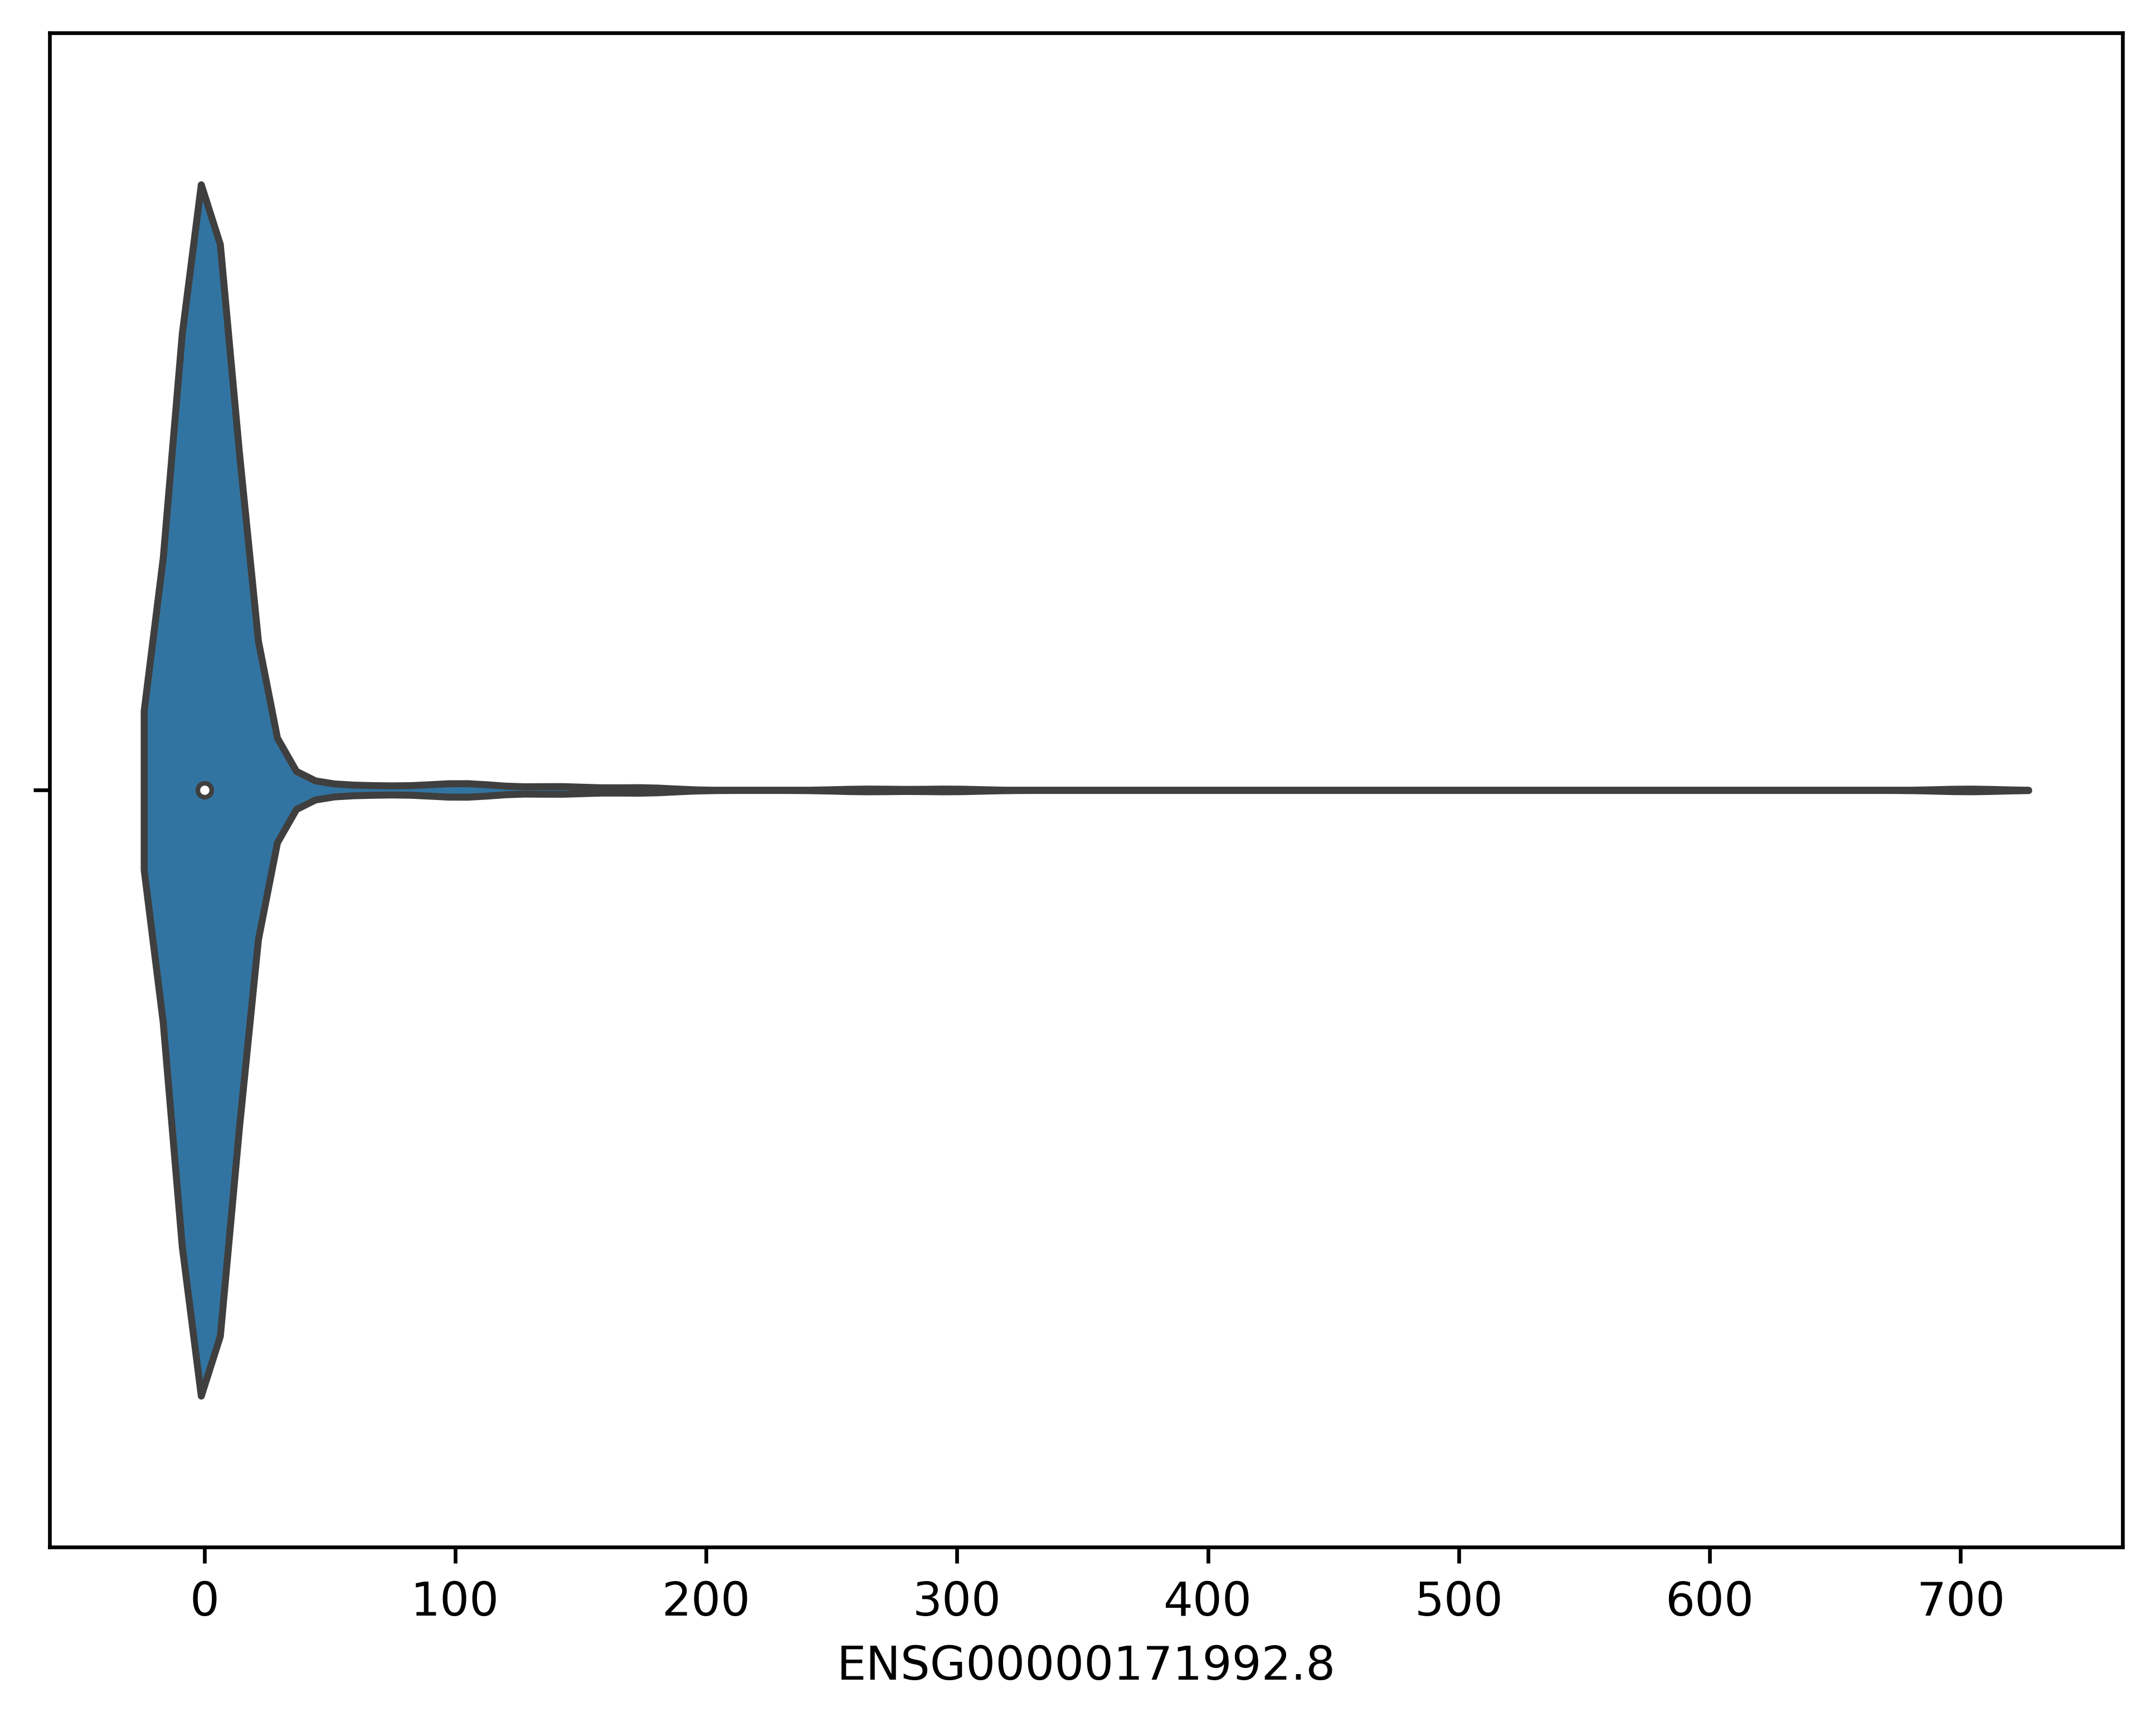

In [55]:
ax = sns.violinplot(x=tmp["ENSG00000171992.8"])

# Separate by subclass

In [70]:
snv_profile = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_snv_on_filtered_genes_pass_40_cells.csv',index_col=0)

In [74]:
snv_profile.shape

(3516, 489)

In [72]:
gene_profile = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_cpm_final_1000genes.csv',index_col=0)

In [75]:
gene_profile.shape

(1000, 489)

In [230]:
label_info_filtered = label_info.loc[gene_profile.columns.values,]

In [231]:
for i in range(label_info_filtered.shape[0]):
    if label_info_filtered.iloc[i,0] == "MGH26-2":
        label_info_filtered.iloc[i,0] = "MGH26"


In [232]:
cell_type = list(label_info_filtered.label.value_counts().index.values)

In [233]:
cell_type

['MGH26', 'MGH29', 'MGH30', 'MGH31', 'CSC8', 'CSC6', 'MGH28']

In [151]:
saved_path_folder = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile"

In [171]:
for celltype in cell_type:
    tmp_sample = label_info_filtered.loc[label_info_filtered.label == celltype,].index.values
    
    tmp = 'GSE57872_final_cpm_' + celltype + '.csv'
    tmp_gene_profile = gene_profile.loc[:,tmp_sample]
    saved_file_name = os.path.join(saved_path_folder,tmp)
    tmp_gene_profile.to_csv(saved_file_name)
    
    tmp_snv = 'GSE57872_final_snv_' + celltype + '.csv'
    tmp_snv_profile = snv_profile.loc[:,tmp_sample]
    saved_file_name_snv = os.path.join(saved_path_folder,tmp_snv)
    tmp_snv_profile.to_csv(saved_file_name_snv)
    print(saved_file_name)
    print(saved_file_name_snv)

/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH26.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH26.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH29.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH29.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH30.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH30.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH31.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH31.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_CSC8.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_CSC8.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_CSC6.csv
/data8t/mtx/s

In [172]:
# separate by patients and cell line

In [180]:
label_info_filtered_2_class = label_info_filtered

In [181]:
label_info_filtered_2_class.label = label_info_filtered_2_class.label.str.slice(start=0,stop=3)

In [182]:
label_info_filtered_2_class

,label,single_or_bulk,sample_title,subtype,description
run_accession,,,,,
SRR1294493,MGH,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A02,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294494,MGH,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A03,subtype: Pro+Cla,processed data file: GBM_data_matrix.txt
SRR1294496,MGH,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A05,subtype: Pro+Cla,processed data file: GBM_data_matrix.txt
SRR1294497,MGH,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A06,NaN,Please note that this sample did not pass the ...
SRR1294498,MGH,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A07,subtype: Pro,processed data file: GBM_data_matrix.txt
...,...,...,...,...,...
SRR1295349,CSC,Single cell mRNA-seq,Single cell mRNA-seq_CSC8_H06,NaN,processed data file: GBM_data_matrix.txt
SRR1295350,CSC,Single cell mRNA-seq,Single cell mRNA-seq_CSC8_H07,NaN,processed data file: GBM_data_matrix.txt
SRR1295352,CSC,Single cell mRNA-seq,Single cell mRNA-seq_CSC8_H09,NaN,processed data file: GBM_data_matrix.txt


In [183]:
cell_type_2_class = list(label_info_filtered_2_class.label.value_counts().index.values)

In [184]:
cell_type_2_class

['MGH', 'CSC']

In [189]:
for celltype in cell_type_2_class:
        
    tmp_sample = label_info_filtered.loc[label_info_filtered_2_class.label == celltype,].index.values
    
    tmp = 'GSE57872_final_cpm_' + celltype + '.csv'
    tmp_gene_profile = gene_profile.loc[:,tmp_sample]
    saved_file_name = os.path.join(saved_path_folder,tmp)
    tmp_gene_profile.to_csv(saved_file_name)
    
    tmp_snv = 'GSE57872_final_snv_' + celltype + '.csv'
    tmp_snv_profile = snv_profile.loc[:,tmp_sample]
    saved_file_name_snv = os.path.join(saved_path_folder,tmp_snv)
    tmp_snv_profile.to_csv(saved_file_name_snv)
    print(saved_file_name)
    print(saved_file_name_snv)

/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_CSC.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_CSC.csv


## separate by cell type

In [195]:
label_info_filtered['subtype'].value_counts()

subtype: None       100
subtype: Mes         74
subtype: Pro         65
subtype: Cla         41
subtype: Neu         23
subtype: Neu+Mes     18
subtype: Pro+Cla     17
subtype: Pro+Neu      5
subtype: Cla+Mes      2
subtype: Neu+Cla      2
Name: subtype, dtype: int64

In [234]:
label_info_filtered_celltype =label_info_filtered.loc[(label_info_filtered['subtype'] == 'subtype: Mes') | (label_info_filtered['subtype'] == 'subtype: Pro')|(label_info_filtered['subtype'] == 'subtype: Cla')|(label_info_filtered['subtype'] == 'subtype: Neu'),]

In [237]:
label_info_filtered_celltype

,label,single_or_bulk,sample_title,subtype,description
run_accession,,,,,
SRR1294493,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A02,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294498,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A07,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294499,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A08,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294500,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A09,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294503,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A12,subtype: Pro,processed data file: GBM_data_matrix.txt
...,...,...,...,...,...
SRR1295052,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_G09,subtype: Cla,processed data file: GBM_data_matrix.txt
SRR1295055,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_G12,subtype: Mes,processed data file: GBM_data_matrix.txt
SRR1295056,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_H01,subtype: Mes,processed data file: GBM_data_matrix.txt


In [241]:
gene_profile.loc[:,label_info_filtered_celltype.index.values].to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_patient_celltype.csv')

In [242]:
snv_profile.loc[:,label_info_filtered_celltype.index.values].to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_patient_celltype.csv')

In [243]:
gene_profile.loc[:,label_info_filtered_celltype.index.values]

,SRR1294493,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294505,SRR1294508,SRR1294515,SRR1294530,SRR1294544,...,SRR1295027,SRR1295033,SRR1295038,SRR1295039,SRR1295040,SRR1295052,SRR1295055,SRR1295056,SRR1295061,SRR1295066
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000064886.9,0,0,0,0,0,0,0,0,0,0,...,15,840,0,0,0,0,0,1930,283,2026
ENSG00000175899.10,0,0,0,0,0,0,0,0,0,0,...,0,1814,0,132,72,1,32,38,25,146
ENSG00000106366.7,0,0,0,0,0,0,0,0,105,193,...,0,0,0,123,385,319,291,87,89,0
ENSG00000112096.12,0,3,0,0,0,0,841,0,85,7,...,93,2501,1548,759,61,139,237,11408,835,7591
ENSG00000118785.9,0,0,0,0,0,0,0,0,0,0,...,6,0,0,823,187,1,0,76,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000224439.2,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
ENSG00000170385.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,0
ENSG00000125967.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
label_info_filtered_celltype.subtype.value_counts()

subtype: Mes    74
subtype: Pro    65
subtype: Cla    41
subtype: Neu    23
Name: subtype, dtype: int64

In [247]:
cell_subtype_4_class = list(label_info_filtered_celltype.subtype.value_counts().index.values)

In [248]:
cell_subtype_4_class

['subtype: Mes', 'subtype: Pro', 'subtype: Cla', 'subtype: Neu']

In [256]:
for celltype in cell_subtype_4_class:
    celltype_short = celltype.split(":")[-1].strip()
    print(celltype_short)
        
    tmp_sample = label_info_filtered_celltype.loc[label_info_filtered_celltype.subtype == celltype,].index.values
    
    tmp = 'GSE57872_final_cpm_subcelltype_' + celltype_short + '.csv'
    tmp_gene_profile = gene_profile.loc[:,tmp_sample]
    saved_file_name = os.path.join(saved_path_folder,tmp)
    tmp_gene_profile.to_csv(saved_file_name)
    
    tmp_snv = 'GSE57872_final_snv_subcelltype_' + celltype_short + '.csv'
    tmp_snv_profile = snv_profile.loc[:,tmp_sample]
    saved_file_name_snv = os.path.join(saved_path_folder,tmp_snv)
    tmp_snv_profile.to_csv(saved_file_name_snv)
    print(saved_file_name)
    print(saved_file_name_snv)

Mes
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_subcelltype_Mes.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_subcelltype_Mes.csv
Pro
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_subcelltype_Pro.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_subcelltype_Pro.csv
Cla
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_subcelltype_Cla.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_subcelltype_Cla.csv
Neu
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_subcelltype_Neu.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_subcelltype_Neu.csv


# Real Experiment, see here!

In [262]:
gtf_index_df = pd.read_csv("/data8t/mtx/scSNV/dataset_v1/kim/data/gtf_index/GTF_index.csv", index_col='Geneid')
gene_set_80 = pd.read_csv('./GSE57872_gene_set',header=None)
gene_set_800 = pd.read_csv('./gene_set_800.txt',header=None)
gene_set_80 = gene_set_80.rename(columns={0:'genename'})
gene_set_800 = gene_set_800.rename(columns={0:'genename'})

In [270]:
gene_set = set(gene_set_80.genename.str.slice(stop=-1)).union(set(gene_set_800.genename.values))

In [258]:
gtf_index_df

,chr,start,end,gene_name
Geneid,,,,
ENSG00000223972.4,chr1,11869,14412,DDX11L1
ENSG00000227232.4,chr1,14363,29806,WASH7P
ENSG00000243485.2,chr1,29554,31109,MIR1302-11
ENSG00000237613.2,chr1,34554,36081,FAM138A
ENSG00000268020.2,chr1,52473,54936,OR4G4P
...,...,...,...,...
ENSG00000198695.2,chrM,14149,14673,MT-ND6
ENSG00000210194.1,chrM,14674,14742,MT-TE
ENSG00000198727.2,chrM,14747,15887,MT-CYB


In [259]:
def search_snv_from_gtfindex(snv_list, gtf_index_df):
    # snv_list can be list or numpy array
    # for str, try to convert it to list(with only one snv)
    # each item in snv_list is named like chr7_123
    if isinstance(snv_list, str):
        snv_list = [snv_list]
    snv_location = defaultdict(list)
    j = 0
    for i in snv_list:
        j += 1
        if j%5000 == 0:
            print(j)
        chrom = i.split("__")[0]
        pos = int(i.split("__")[1])
        result_df = gtf_index_df[(gtf_index_df['chr'] == chrom) & (gtf_index_df['start'] <= pos) & (gtf_index_df['end'] >= pos)]
        gene_id_list = list(result_df.index.values)
        snv_location[i] = gene_id_list
    return snv_location

In [377]:
gene_set_id = gtf_index_df.loc[gtf_index_df['gene_name'].isin(gene_set),].index.values

In [378]:
len(gene_set_id)

823

In [289]:
cpm_profile_real = cpm_profile.loc[:, snv_profile.columns.values]
snv_profile_real = snv_profile

In [304]:
cpm_profile_real = cpm_profile_real.loc[gene_set_id,label_info_filtered_celltype.index.values]

In [300]:
snv_profile_real = snv_profile_real.loc[:,label_info_filtered_celltype.index.values]

In [297]:
label_info_filtered_celltype

,label,single_or_bulk,sample_title,subtype,description
run_accession,,,,,
SRR1294493,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A02,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294498,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A07,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294499,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A08,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294500,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A09,subtype: Pro,processed data file: GBM_data_matrix.txt
SRR1294503,MGH26,Single cell mRNA-seq,Single cell mRNA-seq_MGH26_A12,subtype: Pro,processed data file: GBM_data_matrix.txt
...,...,...,...,...,...
SRR1295052,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_G09,subtype: Cla,processed data file: GBM_data_matrix.txt
SRR1295055,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_G12,subtype: Mes,processed data file: GBM_data_matrix.txt
SRR1295056,MGH31,Single cell mRNA-seq,Single cell mRNA-seq_MGH31_H01,subtype: Mes,processed data file: GBM_data_matrix.txt


In [330]:
gene_set_valid = (cpm_profile_real > 2).sum(axis=1)
gene_set_valid = gene_set_valid[gene_set_valid > 20].index.values

In [379]:
len(gene_set_valid)

668

In [334]:
cpm_profile_real = cpm_profile_real.loc[gene_set_valid,]

In [345]:
snv_valid_real = snv_profile_real.sum(axis = 1)
snv_valid_real = snv_valid_real[snv_valid_real>20].index.values

In [347]:
len(snv_valid_real)

2474

In [348]:
snv_profile_real = snv_profile_real.loc[snv_valid_real,]

In [349]:
cpm_profile_real

,SRR1294493,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294505,SRR1294508,SRR1294515,SRR1294530,SRR1294544,...,SRR1295027,SRR1295033,SRR1295038,SRR1295039,SRR1295040,SRR1295052,SRR1295055,SRR1295056,SRR1295061,SRR1295066
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000074800.9,2877,1997,1047,1164,1183,1107,1592,920,7501,242,...,1530,3278,4693,1700,9076,4920,8249,1663,1734,1194
ENSG00000162493.12,0,0,14,0,26,0,10,0,0,0,...,0,225,71,327,14,138,349,218,134,239
ENSG00000127472.6,0,0,0,0,0,0,0,0,0,0,...,0,130,33,0,0,0,40,175,0,0
ENSG00000070831.11,7,0,87,1,1,0,0,1,2,0,...,174,80,71,327,155,259,22,115,119,154
ENSG00000117632.16,1263,1403,8,2242,83,1118,255,807,1906,1229,...,0,454,5,5,0,0,291,131,0,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165704.10,0,213,0,0,0,0,0,124,0,0,...,0,0,0,36,14,5,0,60,65,0
ENSG00000029993.10,165,0,0,0,230,0,5,0,24,0,...,2,0,0,50,0,229,0,0,0,47
ENSG00000011677.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,23,0,0,0,0,0,52


In [350]:
snv_profile_real

,SRR1294493,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294505,SRR1294508,SRR1294515,SRR1294530,SRR1294544,...,SRR1295027,SRR1295033,SRR1295038,SRR1295039,SRR1295040,SRR1295052,SRR1295055,SRR1295056,SRR1295061,SRR1295066
SNVid,,,,,,,,,,,,,,,,,,,,,
chr1__888639,0,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chr1__1247494,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,1
chr1__13940864,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
chr1__13942731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1__20982631,0,0,0,1,1,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr7__55312340,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1
chr7__32957661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr3__187927165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [353]:
cpm_profile_real.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm.csv')
snv_profile_real.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv.csv')

In [386]:
for celltype in cell_subtype_4_class:
    celltype_short = celltype.split(":")[-1].strip()
    print(celltype_short)
        
    tmp_sample = label_info_filtered_celltype.loc[label_info_filtered_celltype.subtype == celltype,].index.values
    
    tmp = 'GSE57872_real_cpm_subcelltype_' + celltype_short + '.csv'
    tmp_gene_profile = cpm_profile_real.loc[:,tmp_sample]
    saved_file_name = os.path.join(saved_path_folder,tmp)
    tmp_gene_profile.to_csv(saved_file_name)
    
    tmp_snv = 'GSE57872_real_snv_subcelltype_' + celltype_short + '.csv'
    tmp_snv_profile = snv_profile_real.loc[:,tmp_sample]
    saved_file_name_snv = os.path.join(saved_path_folder,tmp_snv)
    tmp_snv_profile.to_csv(saved_file_name_snv)
    print(saved_file_name)
    print(saved_file_name_snv)

Mes
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes.csv
Pro
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Pro.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Pro.csv
Cla
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Cla.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Cla.csv
Neu
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Neu.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Neu.csv


In [403]:
cell_subtype_4_class

['subtype: Mes', 'subtype: Pro', 'subtype: Cla', 'subtype: Neu']

In [413]:
# only select Mes and Pro type
cpm_profile_real.loc[:,label_info_filtered_celltype.loc[(label_info_filtered_celltype.subtype == 'subtype: Mes') | (label_info_filtered_celltype.subtype == 'subtype: Pro'),].index.values].to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes_and_Pro.csv')

In [414]:
cpm_profile_real.loc[:,label_info_filtered_celltype.loc[(label_info_filtered_celltype.subtype == 'subtype: Mes') | (label_info_filtered_celltype.subtype == 'subtype: Pro'),].index.values]

,SRR1294493,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294505,SRR1294508,SRR1294515,SRR1294530,SRR1294544,...,SRR1294977,SRR1294982,SRR1295020,SRR1295024,SRR1295027,SRR1295039,SRR1295040,SRR1295055,SRR1295056,SRR1295066
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000074800.9,2877,1997,1047,1164,1183,1107,1592,920,7501,242,...,874,1450,795,1086,1530,1700,9076,8249,1663,1194
ENSG00000162493.12,0,0,14,0,26,0,10,0,0,0,...,591,849,219,703,0,327,14,349,218,239
ENSG00000127472.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,175,0
ENSG00000070831.11,7,0,87,1,1,0,0,1,2,0,...,372,209,167,27,174,327,155,22,115,154
ENSG00000117632.16,1263,1403,8,2242,83,1118,255,807,1906,1229,...,592,488,217,101,0,5,0,291,131,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165704.10,0,213,0,0,0,0,0,124,0,0,...,0,0,0,0,0,36,14,0,60,0
ENSG00000029993.10,165,0,0,0,230,0,5,0,24,0,...,17,0,0,0,2,50,0,0,0,47
ENSG00000011677.8,0,0,0,0,0,0,0,0,0,0,...,0,8,27,0,0,23,0,0,0,52


In [415]:
snv_profile_real.loc[:,label_info_filtered_celltype.loc[(label_info_filtered_celltype.subtype == 'subtype: Mes') | (label_info_filtered_celltype.subtype == 'subtype: Pro'),].index.values].to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes_and_Pro.csv')

In [416]:
snv_profile_real.loc[:,label_info_filtered_celltype.loc[(label_info_filtered_celltype.subtype == 'subtype: Mes') | (label_info_filtered_celltype.subtype == 'subtype: Pro'),].index.values]

,SRR1294493,SRR1294498,SRR1294499,SRR1294500,SRR1294503,SRR1294505,SRR1294508,SRR1294515,SRR1294530,SRR1294544,...,SRR1294977,SRR1294982,SRR1295020,SRR1295024,SRR1295027,SRR1295039,SRR1295040,SRR1295055,SRR1295056,SRR1295066
SNVid,,,,,,,,,,,,,,,,,,,,,
chr1__888639,0,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chr1__1247494,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
chr1__13940864,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
chr1__13942731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1__20982631,0,0,0,1,1,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr7__55312340,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,1
chr7__32957661,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
chr3__187927165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
for celltype in cell_subtype_4_class:
    celltype_short = celltype.split(":")[-1].strip()
    print(celltype_short)
        
    tmp_sample = label_info_filtered_celltype.loc[label_info_filtered_celltype.subtype == celltype,].index.values
    
    tmp = 'GSE57872_real_cpm_subcelltype_' + celltype_short + '.csv'
    tmp_gene_profile = cpm_profile_real.loc[:,tmp_sample]
    saved_file_name = os.path.join(saved_path_folder,tmp)
    #tmp_gene_profile.to_csv(saved_file_name)
    
    tmp_snv = 'GSE57872_real_snv_subcelltype_' + celltype_short + '.csv'
    tmp_snv_profile = snv_profile_real.loc[:,tmp_sample]
    saved_file_name_snv = os.path.join(saved_path_folder,tmp_snv)
    #tmp_snv_profile.to_csv(saved_file_name_snv)
    print(saved_file_name)
    print(saved_file_name_snv)

Mes
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes.csv
Pro
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Pro.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Pro.csv
Cla
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Cla.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Cla.csv
Neu
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Neu.csv
/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Neu.csv


In [405]:
celltype

'subtype: Neu'

In [390]:
label_info_filtered_celltype.label.value_counts()

MGH26    61
MGH30    46
MGH29    42
MGH28    31
MGH31    23
Name: label, dtype: int64

In [394]:
label_info_filtered_celltype.loc[label_info_filtered_celltype.label == 'MGH26',].subtype.value_counts()

subtype: Pro    53
subtype: Cla     8
Name: subtype, dtype: int64

In [395]:
label_info_filtered_celltype.loc[label_info_filtered_celltype.label == 'MGH30',].subtype.value_counts()

subtype: Cla    31
subtype: Mes     8
subtype: Pro     6
subtype: Neu     1
Name: subtype, dtype: int64

In [397]:
label_info_filtered_celltype.loc[label_info_filtered_celltype.label == 'MGH29',].subtype.value_counts()

subtype: Mes    26
subtype: Neu    12
subtype: Pro     4
Name: subtype, dtype: int64

In [398]:
label_info_filtered_celltype.loc[label_info_filtered_celltype.label == 'MGH28',].subtype.value_counts()

subtype: Mes    30
subtype: Pro     1
Name: subtype, dtype: int64

In [399]:
label_info_filtered_celltype.loc[label_info_filtered_celltype.label == 'MGH31',].subtype.value_counts()

subtype: Mes    10
subtype: Neu    10
subtype: Cla     2
subtype: Pro     1
Name: subtype, dtype: int64

In [401]:
label_info_filtered_celltype.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_label.csv')

# Third time (patients, cellline, important genes)

In [419]:
third_cpm_profile = cpm_profile.loc[gene_set_id,]

In [429]:
# select all (cellline + patients): select sample
third_all_sample = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_cpm_final_1000genes.csv', index_col=0).columns.values
third_cellline_sample = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_CSC.csv', index_col=0).columns.values
third_patients_sample = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_cpm_MGH.csv', index_col=0).columns.values

# make gene expression profile
third_cpm_profile_all = third_cpm_profile.loc[:,third_all_sample]
third_cpm_profile_cellline = third_cpm_profile.loc[:,third_cellline_sample]
third_cpm_profile_patients = third_cpm_profile.loc[:,third_patients_sample]

In [434]:
third_cpm_profile_all.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_all.csv')
third_cpm_profile_patients.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_patients.csv')
third_cpm_profile_cellline.to_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_cellline.csv')

In [441]:
# make snv profile
# no need